# **Graduate Admission Prediction using Linear Regression**


- This is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.

- To further support students, Company has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

**Buisness Problem:**

- By conducting a thorough analysis, we can assist the compnay in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.

**Column Profiling:**

- **Serial No.**: This column represents the unique row identifier for each applicant in the dataset.
- **GRE Scores**: This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
- **TOEFL Scores**: This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.
- **University Rating**: This column indicates the rating or reputation of the university that the applicants are associated with.
  - The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- **SOP**: This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- **LOR**: This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- **CGPA**: This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.
- **Research**: This column indicates whether the applicant has research experience (1) or not (0).
- **Chance of Admit**: This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1

## **1. Define the problem statement.**

**Hint:**
We want you to discuss the given problem statement with additional views.


- By conducting a thorough analysis, we can assist Company in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.
- The primary objective is to analyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset to construct a predictive model capable of estimating an applicant's likelihood of admission
based on the available features.



---



## **2. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.**
**Hint:**

  We want you to…
  - Drop any irrelevant column present in the dataset.
  - Check the shape of the dataset provided.
  - Check the data type of each column.
  - Comment on the range of attributes.
  - Display the statistical summary of the entire dataset.

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# Downloading the data
!gdown 1YyR7PHYAtzRMzUgwBQ1tnmVSfoZryiO2

Downloading...
From: https://drive.google.com/uc?id=1YyR7PHYAtzRMzUgwBQ1tnmVSfoZryiO2
To: /content/ABC.csv
100% 16.2k/16.2k [00:00<00:00, 39.2MB/s]


In [ ]:
df = pd.read_csv('ABC.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Keeping a copy of original data
data = df.copy()

In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Remove serial number as it is not a feature required for prediction
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
# Seperating the Categorical and Numerical columns seperately
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


**Insights:**
- The Dataset contains 500 rows and 9 columns with no null values.
- Out of the 9 columns the 'Serial No.' is an irrelavant columns hence it has been dropped.
- From the data we can consider 'University Rating', 'SOP', 'LOR' and 'Research' as catergorical columns and 'GRE Score', 'TOEFL Score' and 'CGPA' as Numerical Coumns.
- The 'Chance of Admit' is the target variable.
- Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or missleading data in column).
- Range of GRE score looks like between 290 to 340.
- Range of TOEFL score is between 92 to 120.
- University rating, SOP and LOR are distributed between range of 1 to 5.
- CGPA range is between 6.8 to 9.92




---



## **3. Use Non-graphical and graphical analysis for getting insights about variables.**
**Hint:**

We want you to…
-  Perform a Univariate Analysis - Check the distribution of different
continuous/categorical variables.
  - You could use a histplot, displot or kdeplot.
- Perform a Bivariate Analysis - Check the relationship between different
variables.
  - You could use a scatter plot, regplot or pairplot.

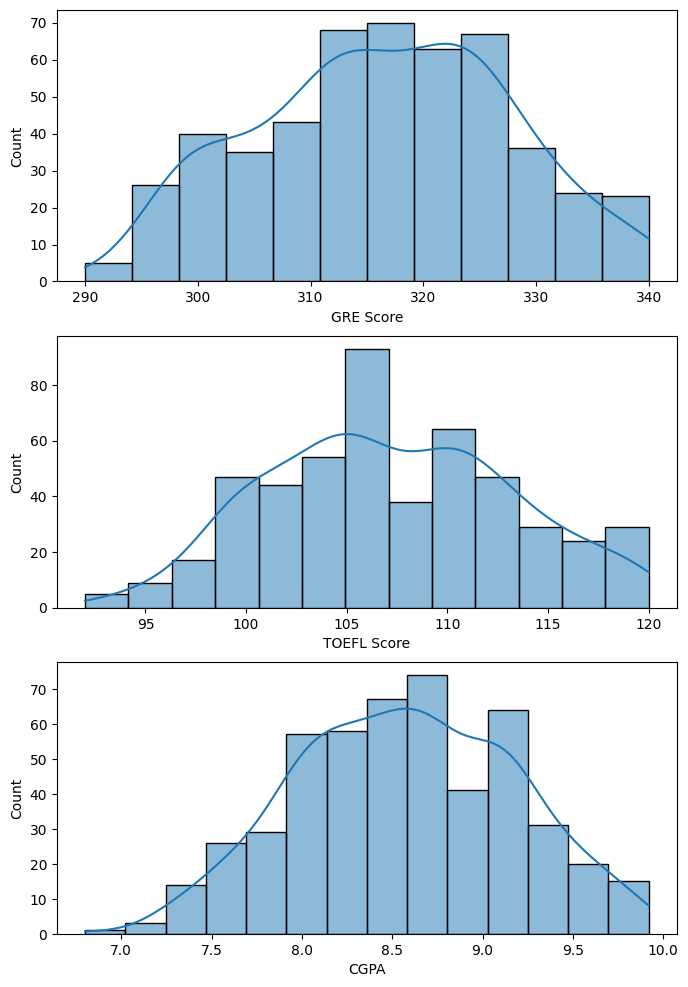

In [ ]:
# check distribution of each numerical variable
rows, columns = 3, 1
plt.figure(figsize=(8, 12))
plt.subplot(rows, columns, 1)
sns.histplot(df[num_cols[0]], kde = True)
plt.subplot(rows, columns, 2)
sns.histplot(df[num_cols[1]], kde = True)
plt.subplot(rows, columns, 3)
sns.histplot(df[num_cols[2]], kde = True)
plt.show()

**Insights:**

- GRE scores are between 290 and 340, with maximum students scoring in the range 310-330.
- TOEFL scores are between 90 and 120, with maximum students scoring around 105.
- CGPA ranges between 7 and 10, with maximum students scoring around 8.5.
- Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%.

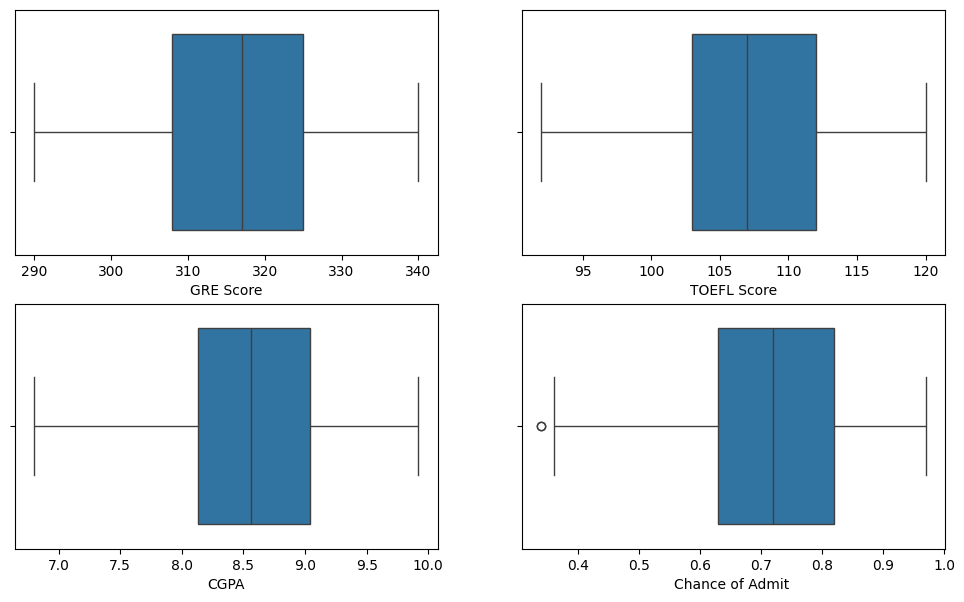

In [ ]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=df['Chance of Admit '], data = df, ax=axs[1,1])
plt.show()


**Insights:**
- From the above boxplots we can see that there are no outliers present in the data.

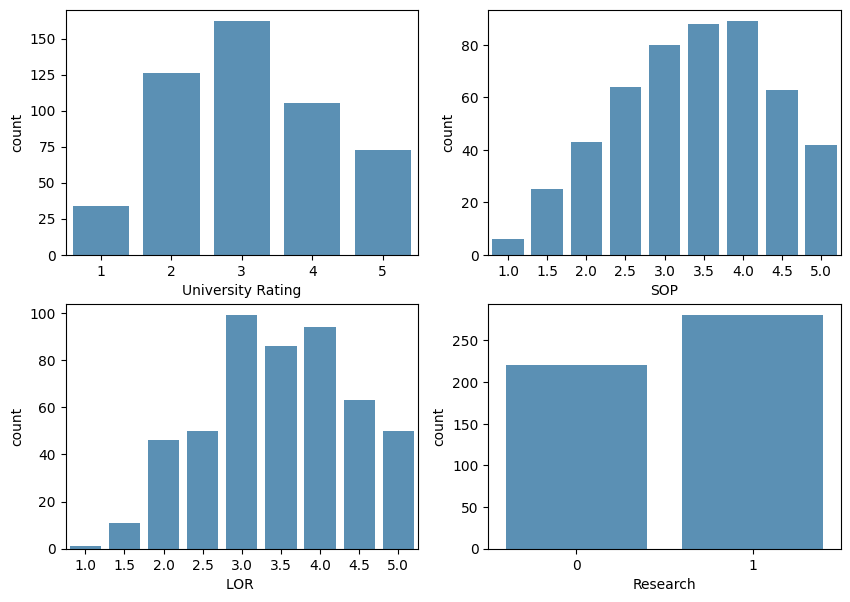

In [ ]:
#countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x = cat_cols[index], data = df, ax = axs[row, col], alpha=0.8)
        index += 1

plt.show()

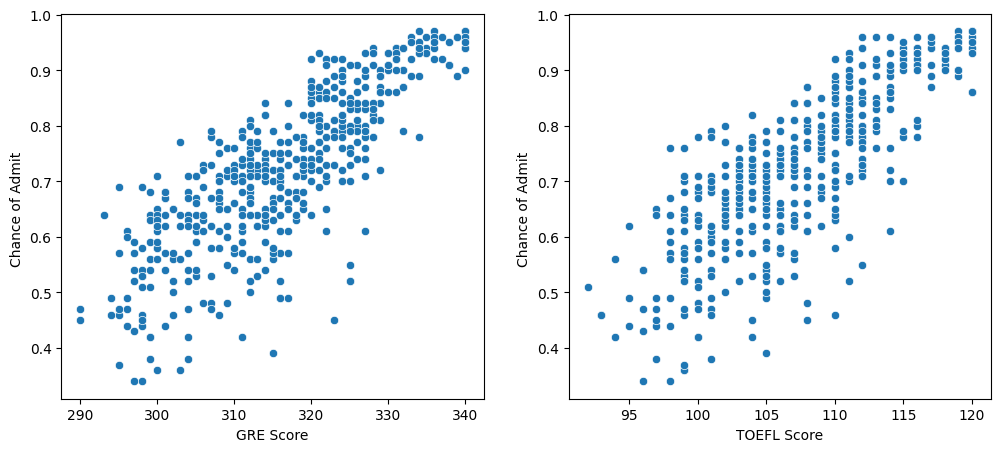

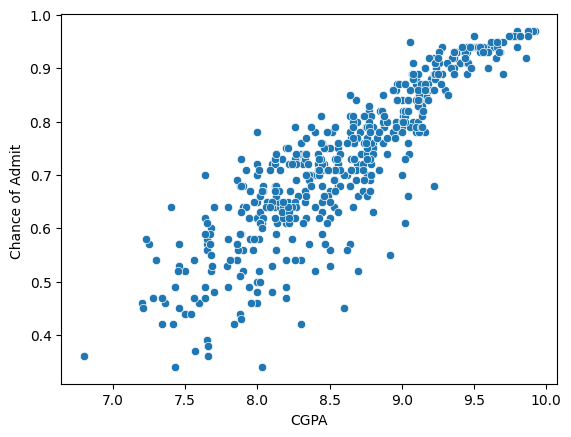

In [ ]:
# check relation between continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x = df[num_cols[0]], y = df['Chance of Admit '], data = df, ax = axs[0])
sns.scatterplot(x = df[num_cols[1]], y = df['Chance of Admit '], data = df, ax = axs[1])
plt.show()
sns.scatterplot(x = df[num_cols[2]], y = df['Chance of Admit '], data = df)
plt.show()

**Insights:**
- There is a linear relationship between the continuous and target variable.

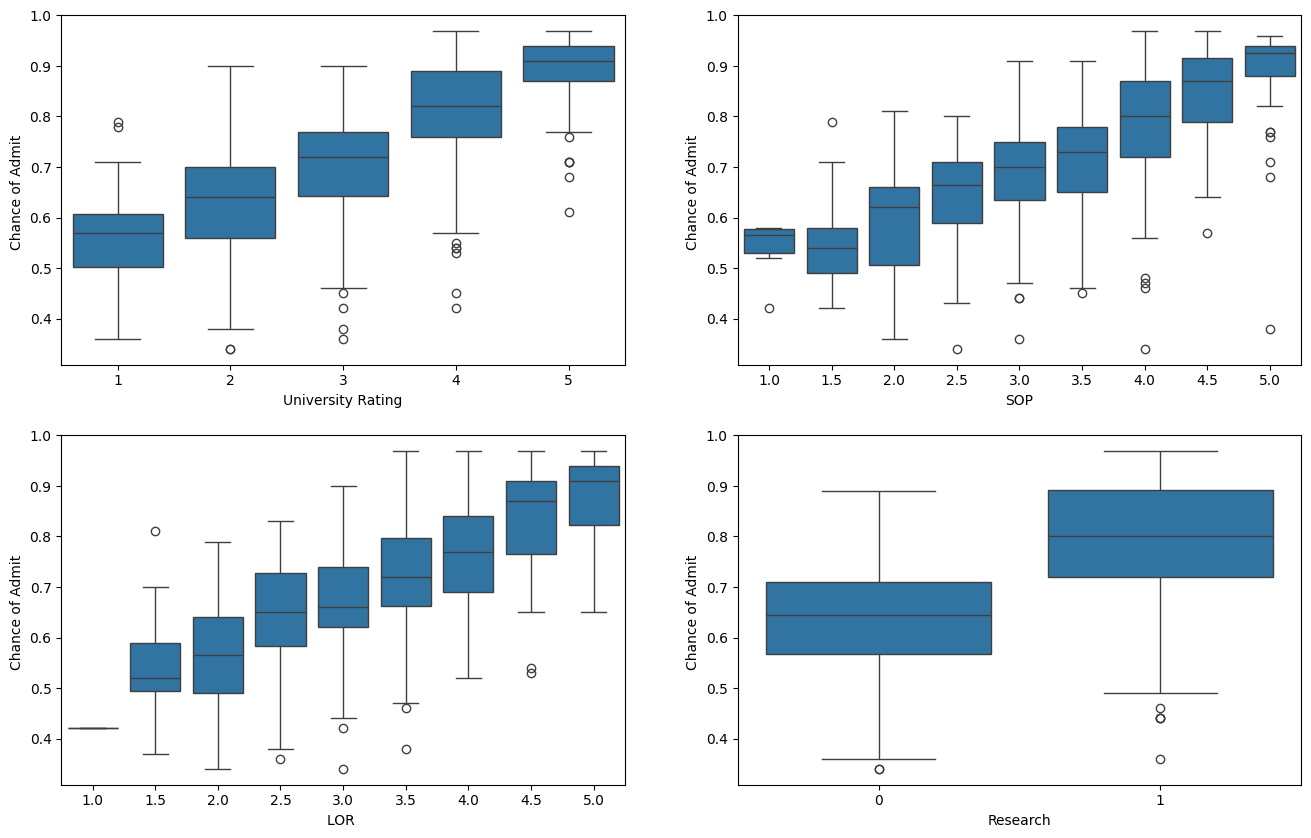

In [ ]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x = df[cat_cols[index]], y = df['Chance of Admit '], data = df, ax = axs[row,col])
        index += 1

**Insights:**

- As you can see from the graphs, as the University rating increases the Chance of Admit also increases.
- Students who have the research experience have more chances of Admit as compared to other students who don't have the research experience.
- The categorical variables such as university ranking, research, quality of SOP and LOR also increase the chances of admit.


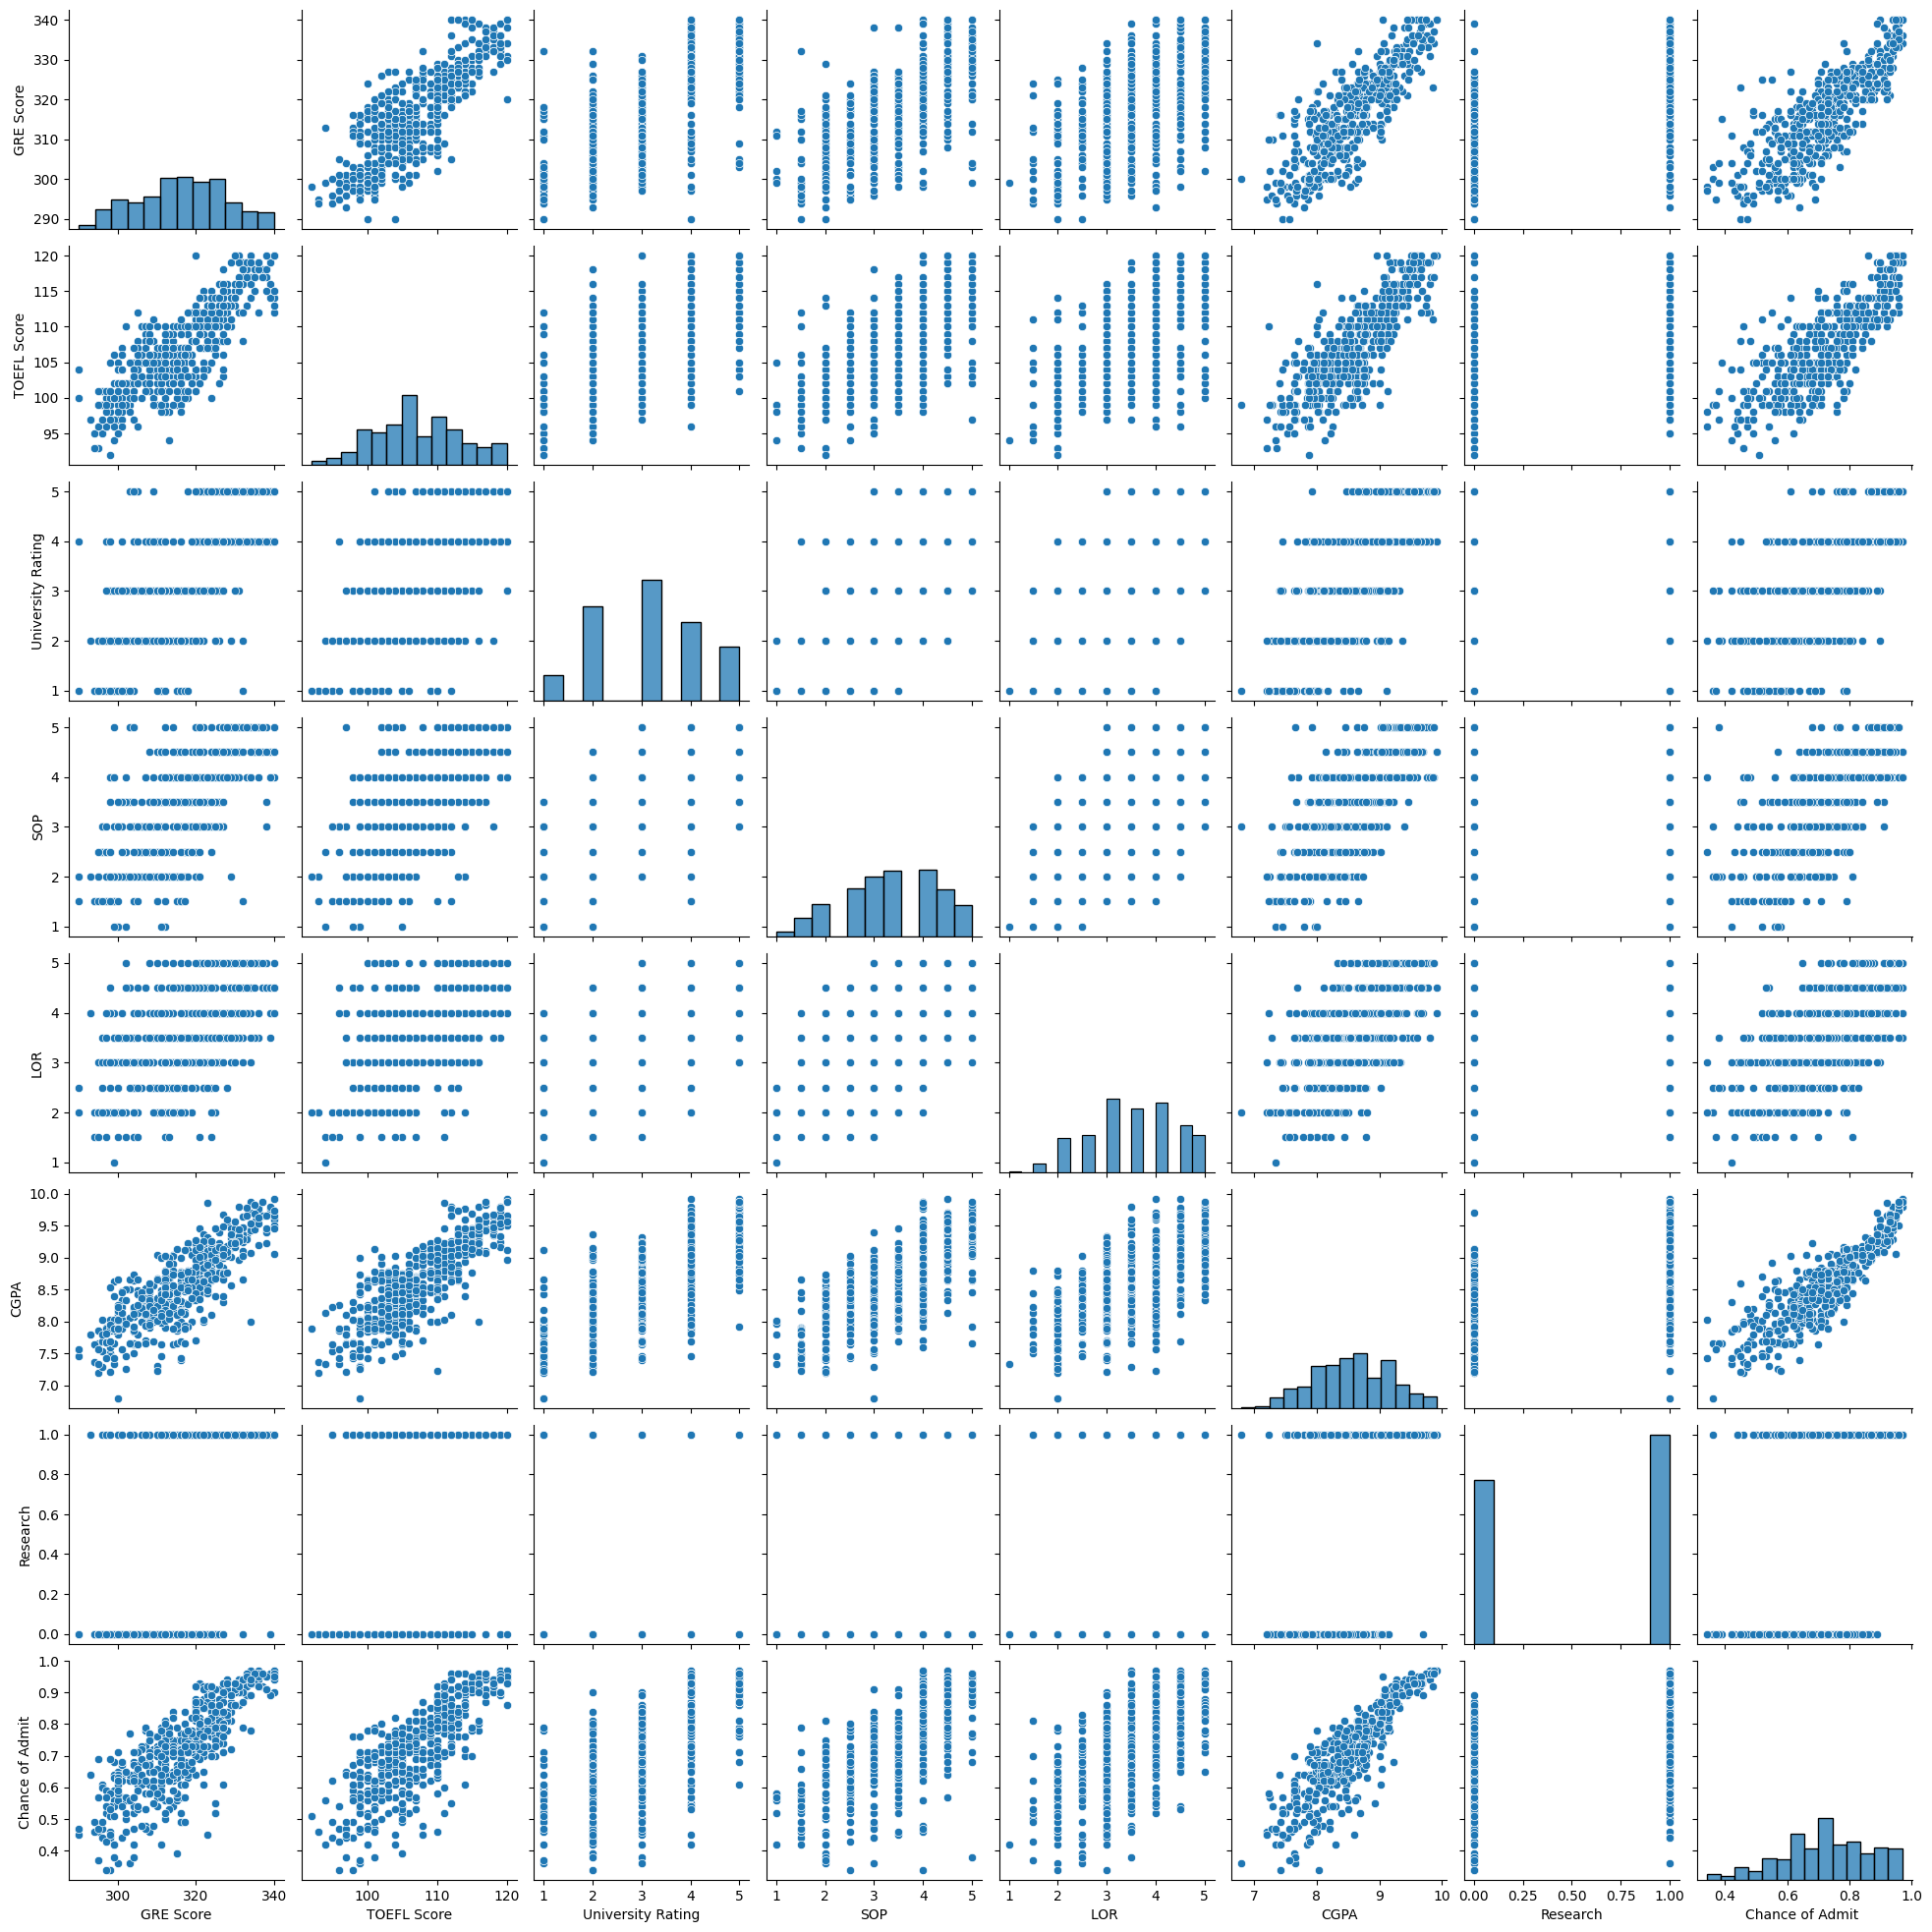

In [ ]:
sns.pairplot(df)
plt.show()

**Insights:**
- Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit.
- While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact.




---



## **4. Perform data preprocessing.**
**Hint:**

We want you to…
  - Check for duplicate records and treat them accordingly if found.
  - Check for missing values and treat them accordingly if found.
  - Check for outlier values and treat them accordingly if found.


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


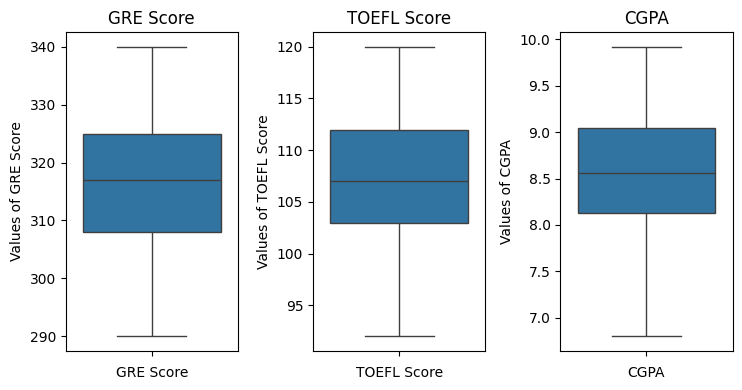

In [ ]:
# Check for outliers in numerical columns
plt.figure(figsize=(10,4))
i=1

for col in num_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

**Insights:**
- From the above boxplot we can see that there are no outliers present.
- Also there are no duplicate and null values present in the data.



---



## **5. Check the correlation among independent variables and how they interact with each other.**
**Hint:**
- We want you to create a correlation matrix/heatmap and drop any feature that has a high correlation (>0.90) with some other feature.


In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

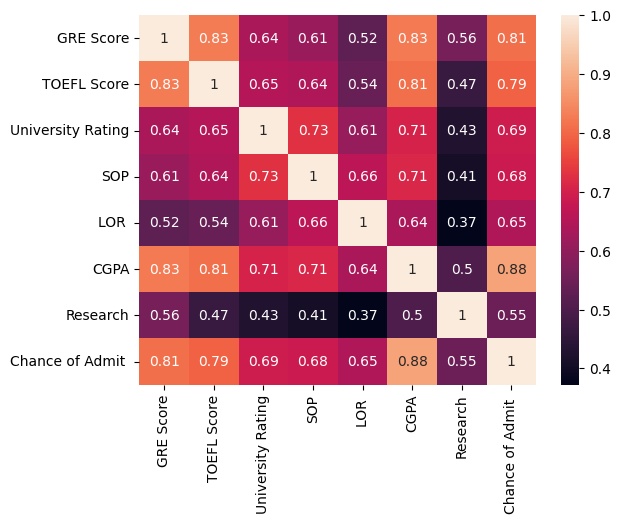

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Insights:**
- Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit



---



## **6. Prepare the data for modeling.**
**Hint:**
- Encode categorical variables (if any) using a suitable method
- Perform the train-test split
- Perform data normalization/standardization

NOTE: Feature scaling should be performed after the train-test split.

**Linear Regression**

In [ ]:
# Importing all the necessary libraries to perform Linear Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [ ]:
X = df.drop(['Chance of Admit '],axis = 1) # independent variables
y = df['Chance of Admit '].values.reshape(-1,1) # target / dependent variables

In [ ]:
X.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [ ]:
y[:5]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65]])

In [ ]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (400, 7)
Shape of X_test: (100, 7)
Shape of y_train: (400, 1)
Shape of y_test: (100, 1)


In [ ]:
#Initialising object of class MinMaxScaler() for Standardisation
scaler_x = MinMaxScaler()
x_cat_encoded = pd.concat([X_train, X_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
56,316,102,3,2.0,3.0,7.40,0
301,319,108,2,2.5,3.0,8.76,0
229,324,111,4,3.0,3.0,9.01,1
331,311,105,2,3.0,2.0,8.12,1
132,309,105,5,3.5,3.5,8.56,0


In [ ]:
#Fitting scaler_x to the training data
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [ ]:
all_cols = X_train.columns
#Transforming numeric columns of x_train and x_test
X_train[all_cols] = scaler_x.transform(X_train[all_cols])
X_test[all_cols] = scaler_x.transform(X_test[all_cols])

In [ ]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,0.88,0.857143,0.75,0.750,0.625,0.878205,1.0
73,0.48,0.571429,0.75,0.875,0.750,0.717949,1.0
374,0.50,0.464286,0.25,0.250,0.375,0.272436,0.0
155,0.44,0.607143,0.50,0.500,0.500,0.605769,0.0
104,0.72,0.714286,0.50,0.625,0.500,0.721154,1.0




---



## **7. Build the Linear Regression model.**
**Hint:**
- Use Linear Regression from Statsmodel library to create a model and comment
on the model statistics.
- Also, display model coefficients with column names.
- Drop columns with p-value > 0.05 (if any) and re-train the model.

In [ ]:
#Initialising object of Class LinearRegression()
LinearRegression = LinearRegression()

In [ ]:
# training LinearRegression model
LinearRegression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Co-efficients
LinearRegression.coef_

array([[0.12172192, 0.08388445, 0.01027519, 0.00725476, 0.06895193,
        0.3510845 , 0.02402679]])

In [ ]:
# Intercept
LinearRegression.intercept_

array([0.34696506])

In [ ]:
# Predicting values for the training and test data
y_pred_train = LinearRegression.predict(X_train)
y_pred_test = LinearRegression.predict(X_test)

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.


model = sm.OLS(y_train, X_sm)
results = model.fit()

# statistical summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          3.41e-142
Time:                        06:44:15   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3470      0.01



---



## **8. Test the assumptions of linear regression**
1. Multicollinearity check by VIF score
  - **Hint:**
    
    Variables are dropped one-by-one till none has a VIF>5.
2. Mean of residuals should be close to zero.
3. Linear relationship between independent & dependent variables.
  - **Hint:**
    
    This can be checked using the following methods:
    - Scatter plots
    - Regression plots
    - Pearson Correlation
4. Test for Homoscedasticity
  - **Hint:**
    - Create a scatterplot of residuals against predicted values.
    - Perform a Goldfeld-Quandt test to check the presence of
    Heteroscedasticity in the data.
    - If the obtained p-value>0.05, there is no strong evidence of
    heteroscedasticity and hence, the presence of Homoscedasticity is
    validated.
5. Normality of residuals
  - **Hint:**
    - Almost bell-shaped curve in residuals distribution.
    - Points in the Q-Q plot are almost all on the line.

In [ ]:
# Multicolinearity chek by VIF Score

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns = X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


In [ ]:
# Mean of residuals should be close to zero

y_predicted = LinearRegression.predict(X_test)
y_predicted.shape

(100, 1)

In [ ]:
#Mean of Residuals
residuals = y_test - y_predicted
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.005453623717661311


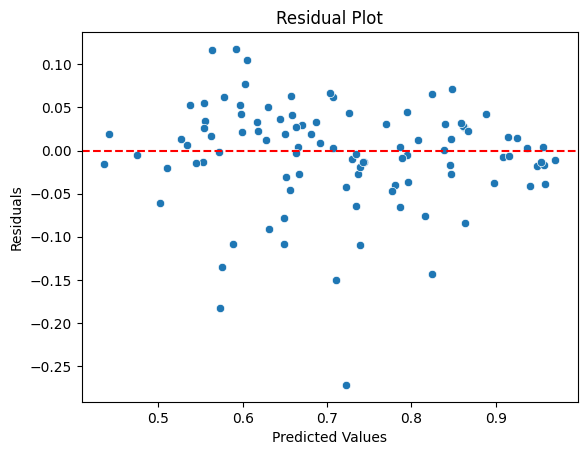

In [ ]:
# Linear relationship between independent & dependent variables

sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

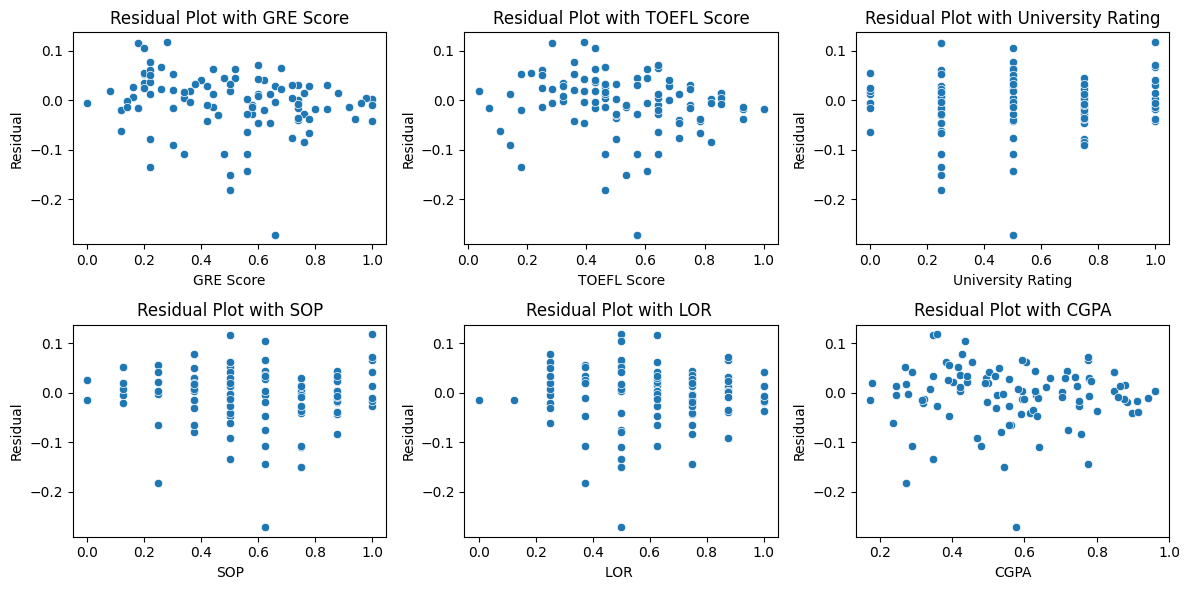

In [ ]:
# Test for Homoscedasticity

plt.figure(figsize=(12,6))
i=1
for col in X_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x = X_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

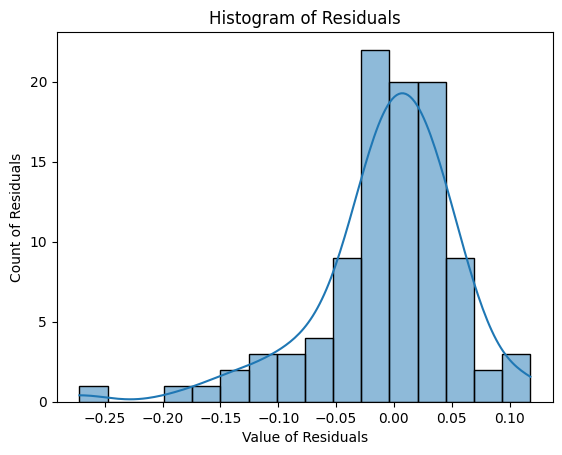

In [ ]:
# Normality of residuals

#Histogram of Residuals
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

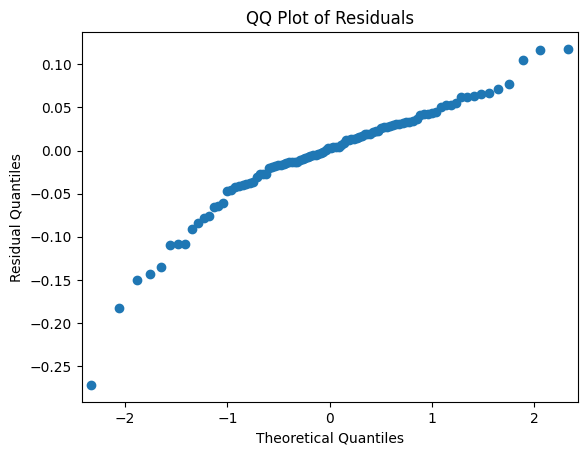

In [ ]:
# QQ-Plot of residuals

sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

**Insights:**

- With all VIF scores below 5, there's little indication of pronounced multicollinearity issues.
- Since the mean of residuals is very close to 0, we can say that the model is unbiased.
- The residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists.
- From the scatter plots, we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.
- The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution.




---



## **9. Evaluate the model's performance.**
- **Hint:**
  - MAE (Mean Absolute Error)
  - RMSE (Root Mean Square Error)
  - R2 score / R-squared value
  - Adjusted R-squared value


In [ ]:
# Evaluating the model using multiple loss functions
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true = y_actual, y_pred = y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true = y_actual,
                                     y_pred = y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true = y_actual, y_pred = y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [ ]:
# Metrics for training data
model_evaluation(y_train, y_pred_train, LinearRegression)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [ ]:
#Metrics for test data
model_evaluation(y_test, y_pred_test, LinearRegression)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


**Insights:**

Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

* Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
* Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
* R2 Score of 0.82 means that our model captures 82% variance in the data
* Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction



---



## **10. Provide Actionable Insights & Recommendations**

**Observations:**
  - The "chance of admission" is a probability measure ranging from 0 to 1, does not exhibit any outliers or misleading data. However, this data is slightly left-skewed.
  -  GRE scores range from 290 to 340.
  -  TOEFL scores range from 92 to 120.
  -  University ratings, SOP (Statement of Purpose), and LOR (Letter of Recommendation) are distributed between 1 and 5.
  -  The CGPA (Cumulative Grade Point Average) ranges from 6.8 to 9.92.
  -  GRE scores, TOEFL scores, and CGPA show a strong positive correlation with the chance of admission, and these variables also exhibit significant mutual correlations.
  -  Categorical variables such as university ranking, research experience, and the quality of SOP/LOR demonstrate an upward trend in relation to the chances of admission.
  -  The first column, which served as a unique row identifier, was dropped as it was not needed for model building.
  -  The dataset contains no null values.
  -  There are no significant outliers in the data.
  -  Independent variables (input data) include GRE score, TOEFL score, university rating, SOP, LOR, CGPA, and research experience.
  -  The target or dependent variable is the chance of admission, which is the value we aim to predict.
  -  Correlation heat maps indicate that GRE score, TOEFL score, and CGPA have a very high correlation with the chance of admission.
  -  University rating, SOP, LOR, and research experience have comparatively lower correlations with the chance of admission than other features.
  -  Boxplots illustrating the distribution of the chance of admission against GRE scores show that higher GRE scores are associated with a higher probability of admission.
  -  Despite multicollinearity, the predictor variables satisfy the prerequisites for Linear Regression, including residuals with a mean close to zero, linearity of variables, normality of residuals, and homoscedasticity.


**Actionable Insights & Recommendations:**

-  Incorporate Additional Features: Given the strong correlations among exam scores, enhancing the model by including additional independent features could improve predictive accuracy.
-  Enhance Awareness through Seminars: Organize seminars to increase awareness about the significance of CGPA and research capabilities, as these factors contribute to a higher chance of admission.
-  Support for GRE Scores, LOR, and SOP: Educational institutions should not only help students improve their GRE scores but also assist in crafting strong Letters of Recommendation (LOR) and Statements of Purpose (SOP) to improve their chances of admission to better universities.
-  Address the Role of SOP and LOR: Although SOP and LOR are valuable predictors, their impact is less pronounced compared to other variables. Careful handling of any outliers in these predictors is necessary.
-  Regular Model Evaluation: Continuously evaluate and refine the model to adapt to any changes in data trends or predictor variable relationships.
-  Student Counselling: Provide personalized counselling for students to address weaknesses in their profiles, including academic performance, research experience, and application materials.
-  Track and Analyse Performance: Monitor the performance of admission predictions and adjust strategies based on the effectiveness of different predictors.





---

